## Dataset Link:  
https://www.kaggle.com/datasets/nikhil1e9/loan-default

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv("Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [4]:
df.shape

(255347, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

## Analysis

Calculate Average Loan amount by Education

In [6]:
df[['Education','LoanAmount']].groupby('Education').mean().round(2)

,LoanAmount
Education,
Bachelor's,127390.63
High School,127393.68
Master's,127710.99
PhD,127823.68


Average Loan amount by Loan purpose

In [7]:
df[['LoanPurpose','LoanAmount']].groupby('LoanPurpose').mean().round(2)

,LoanAmount
LoanPurpose,
Auto,127857.91
Business,127141.81
Education,127645.82
Home,127622.38
Other,127629.65


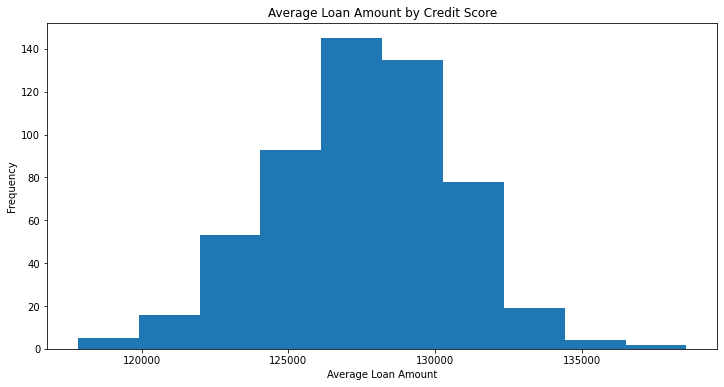

In [8]:
mean_loan_amount=df[['CreditScore','LoanAmount']].groupby('CreditScore').mean().round(2).sort_values(by='CreditScore', ascending=True)

mean_loan_amount.plot(kind='hist', legend=False,figsize=(12, 6))
plt.xlabel('Average Loan Amount')
plt.title('Average Loan Amount by Credit Score')
plt.xticks(rotation=0)
plt.show()

In [9]:
mean_loan_amount

,LoanAmount
CreditScore,
300,131673.88
301,129288.38
302,124391.01
303,124228.15
304,128970.99
...,...
845,129822.40
846,125471.86
847,126856.10


## Data visualization

In [10]:
def chart1(df, column_name):
    # Count the defaults for each category in the specified column
    default_counts = df[df['Default'] == 1][column_name].value_counts().sort_index()

    # Count the non-defaults for each category in the specified column
    non_default_counts = df[df['Default'] == 0][column_name].value_counts().sort_index()

    # Combine the counts into a single DataFrame
    counts = pd.DataFrame({'Default': default_counts, 'Non-Default': non_default_counts}).fillna(0)

    # Calculate total counts per category
    counts['Total'] = counts['Default'] + counts['Non-Default']

    # Calculate percentage of defaults
    counts['Default %'] = (counts['Default'] / counts['Total']) * 100

    # Plot the results
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot stacked bar chart for counts
    counts[['Default', 'Non-Default']].plot(kind='bar', stacked=True, ax=ax, color=['purple', 'skyblue'])
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    ax.set_title(f'Default vs Non-Default by {column_name}')
    ax.legend(title='Status', loc='upper left')

    # Annotate percentages on the bars
    for i, (total, default, percentage) in enumerate(zip(counts['Total'], counts['Default'], counts['Default %'])):
        # Position the annotation at the top of the default bar
        ax.text(i, default + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', color='black')

    plt.xticks(rotation=45)
    plt.show()

In [11]:
def chart2(df, column_name):
    # Count the defaults for each category in the specified column
    default_counts = df[df['Default'] == 1][column_name].value_counts().sort_index()

    # Count the non-defaults for each category in the specified column
    non_default_counts = df[df['Default'] == 0][column_name].value_counts().sort_index()

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.hist(default_counts.index, weights=default_counts, bins=50, alpha=0.5, label='Default', edgecolor='black',color='purple')
    plt.hist(non_default_counts.index, weights=non_default_counts, bins=50, alpha=0.5, label='Non-Default', edgecolor='black',color='skyblue')

    plt.title(f'Default vs Non-Default Distribution by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Status')
    plt.show()

### Default distribution by Age

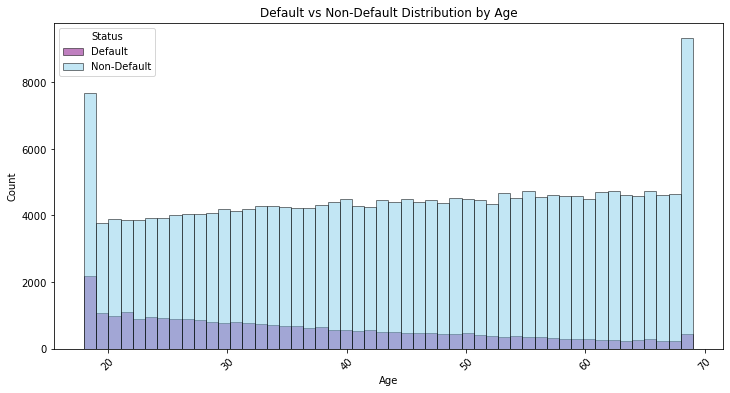

In [12]:
chart2(df,'Age')

### Default distribution by Income

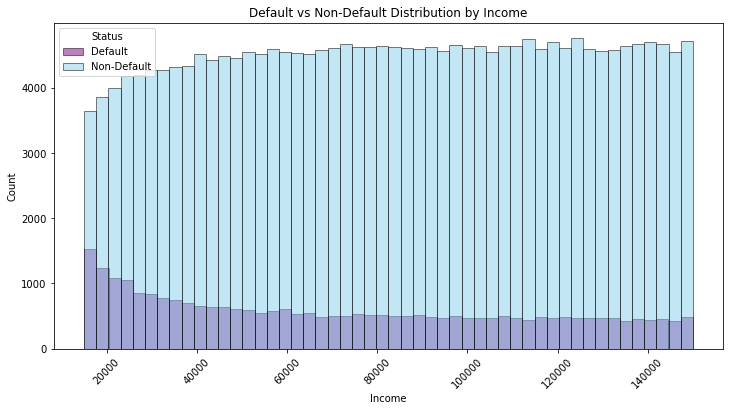

In [13]:
chart2(df,'Income')

### Default distribution by Loan Amount

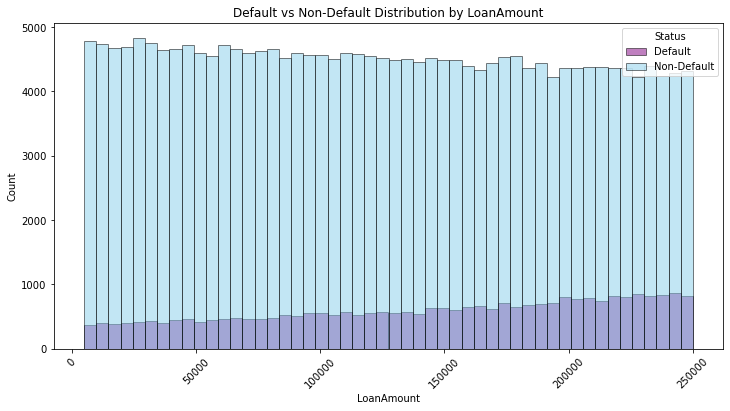

In [14]:
chart2(df,'LoanAmount')

### Default distribution by CreditScore

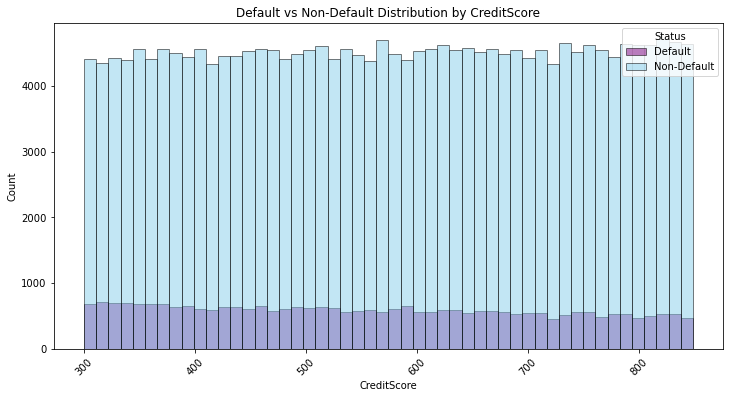

In [15]:
chart2(df,'CreditScore')

### Months Employed

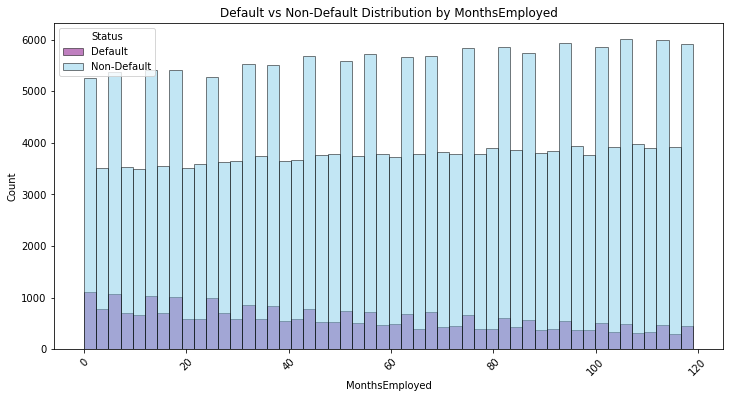

In [16]:
chart2(df,'MonthsEmployed')

### Default distribution by NumCreditLines

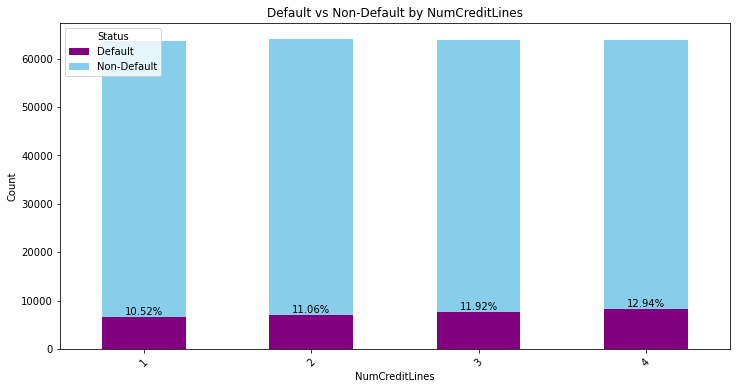

In [17]:
chart1(df,'NumCreditLines')

### Default distribution by Interest Rate

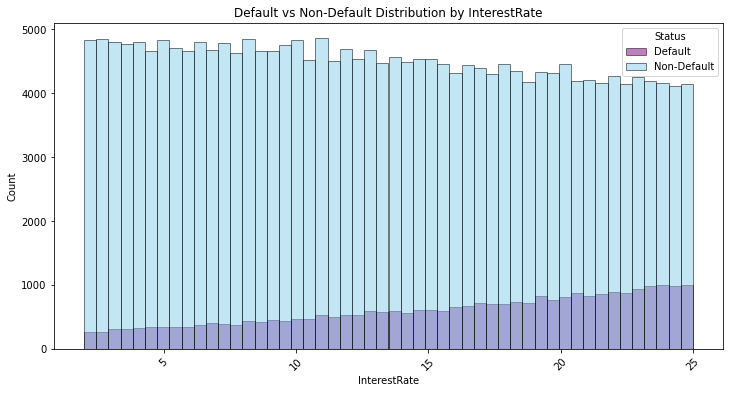

In [18]:
chart2(df,'InterestRate')

### Default distribution by Loan Term

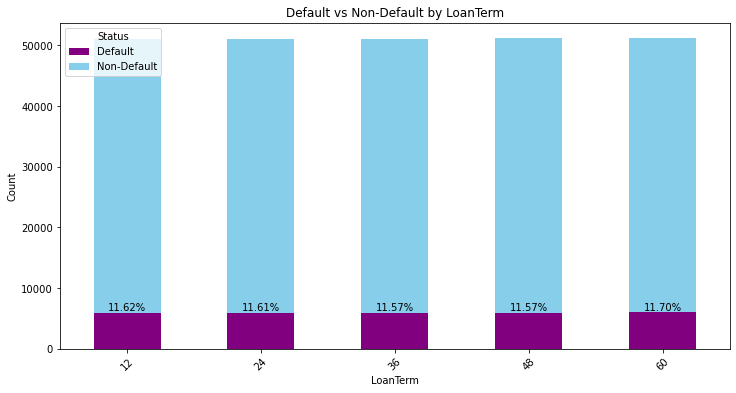

In [19]:
chart1(df,'LoanTerm')

### Default distribution by DTIRatio

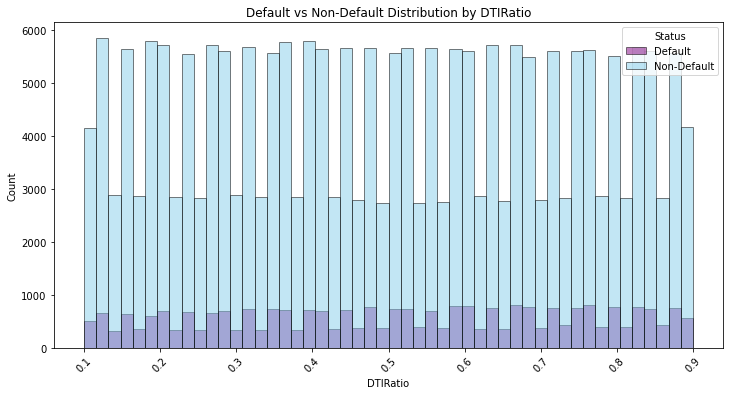

In [20]:
chart2(df,'DTIRatio')

### Default distribution by Education

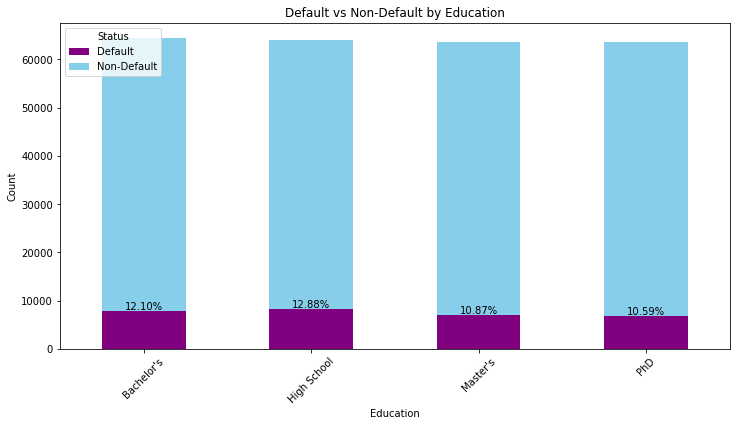

In [21]:
chart1(df,'Education')

### Default distribution by EmploymentType

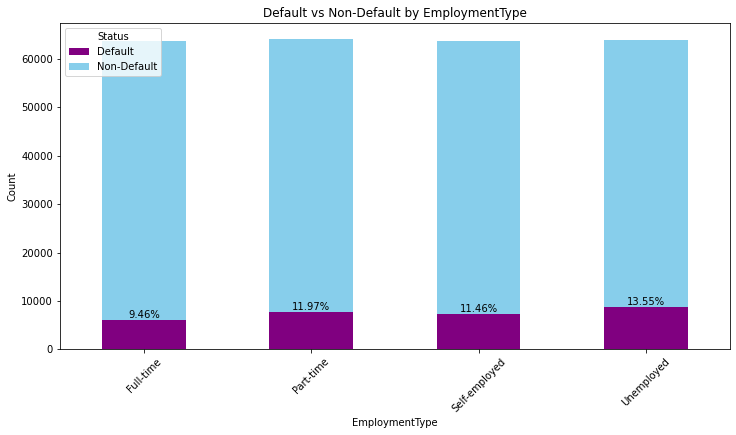

In [22]:
chart1(df,'EmploymentType')

### Default distribution by Marital Status

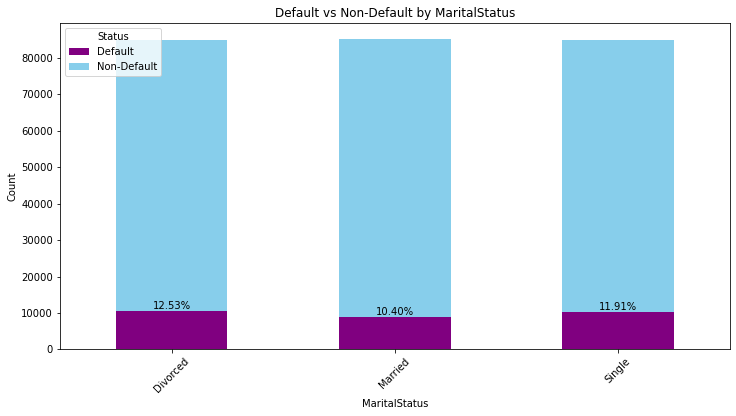

In [23]:
chart1(df,'MaritalStatus')

### Default distribution by Has Mortgage

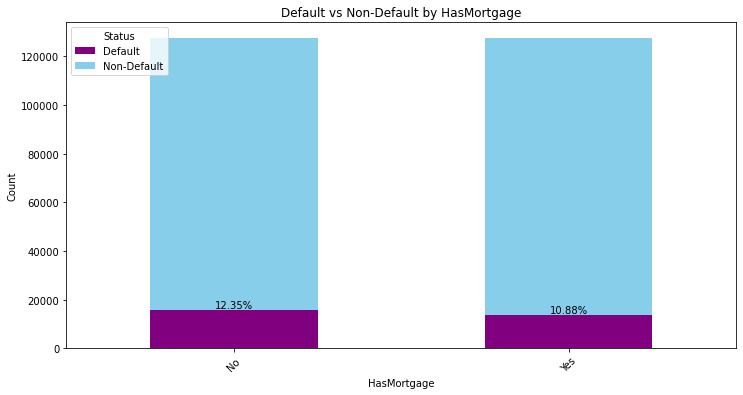

In [24]:
chart1(df,'HasMortgage')

### Default distribution by Has Dependents

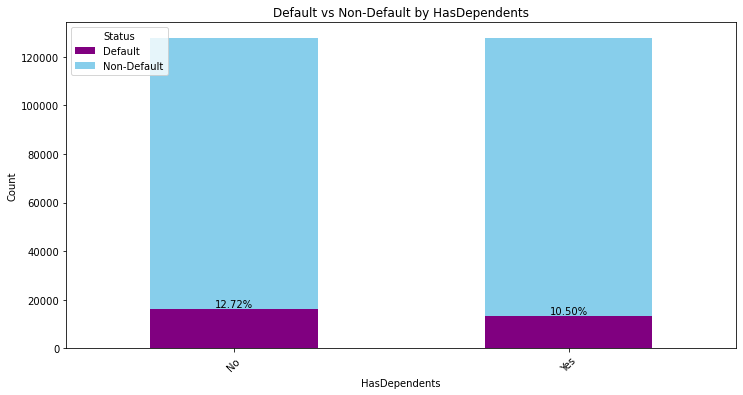

In [25]:
chart1(df,'HasDependents')

### Default distribution by Loan Purpose

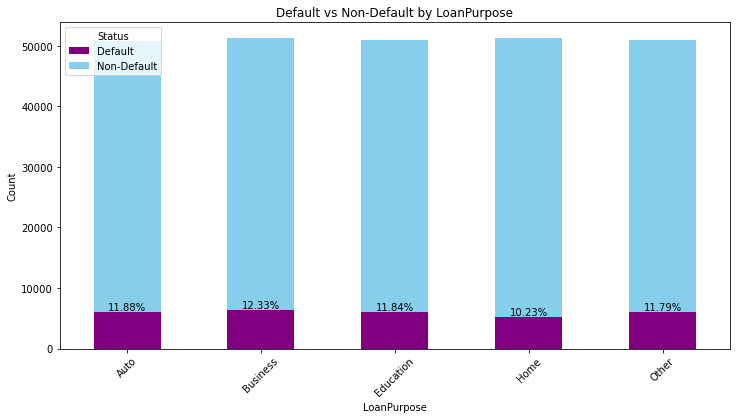

In [26]:
chart1(df,'LoanPurpose')

### Default distribution by Has CoSigner

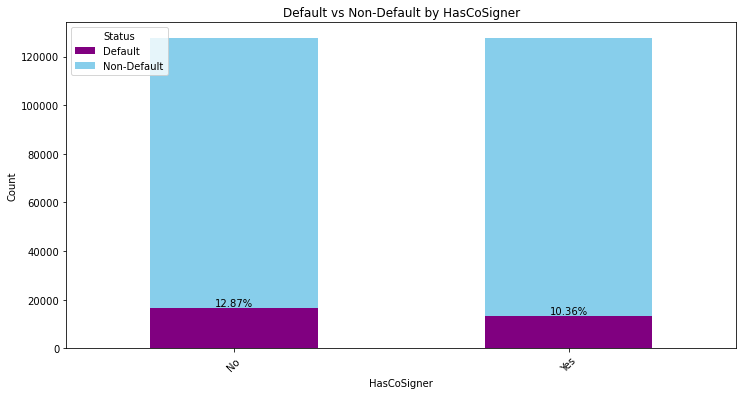

In [27]:
chart1(df,'HasCoSigner')

### Based on these charts, we can conclude that:
**Default Rates and Income**: Default rates tend to decrease as income increases.  
**Default Rates and Age**: Default rates generally decrease with increasing age.  
**Default Rates and Loan Amount**: Default rates increase as the loan amount increases.  
**Default Rates and Credit Score**: Default rates slightly decrease as credit score increases.  
**Default Rates and Months Employed**: Default rates decrease with more months of employment.  
**Default Rates and Number of Credit Lines**: Default rates slightly increase as the number of credit lines increases.  
**Default Rates and Interest Rates**: Default rates increase with higher interest rates.  
**Default Rates and Loan Terms**: Default rates are not significantly affected by changes in loan terms.  
**Default Rates and Debt-to-Income Ratio**: The debt-to-income ratio does not have a substantial effect on default rates.  
**Default Rates and Education Level**: Default rates decrease with higher levels of education.  
**Default Rates and Employment Type**: Default rates vary by employment type. Full-time employees generally have lower default rates, while the unemployed have the highest default rates.  
**Default Rates and Marital Status**: Default rates are highest among divorced individuals.  
**Default Rates and Mortgage Ownership**: Individuals with a mortgage tend to have lower default rates.  
**Default Rates and Dependents**: People with dependents generally have lower default rates.  
**Default Rates by Loan Type**: Business loans have the highest default rates compared to auto, education, home, and other loans. Home loans have the lowest default rates.  
**Default Rates and Co-signers**: Individuals with a co-signer tend to have lower default rates.  

## Recategorize Variables

In [28]:
df[['Education']].value_counts()

Education  
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
dtype: int64

In [29]:
df['EmploymentType'].value_counts()

Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64

In [30]:
df[['MaritalStatus']].value_counts()

MaritalStatus
Married          85302
Divorced         85033
Single           85012
dtype: int64

In [31]:
df[['HasMortgage']].value_counts()

HasMortgage
Yes            127677
No             127670
dtype: int64

In [32]:
df[['HasDependents']].value_counts()

HasDependents
Yes              127742
No               127605
dtype: int64

In [33]:
df[['LoanPurpose']].value_counts()

LoanPurpose
Business       51298
Home           51286
Education      51005
Other          50914
Auto           50844
dtype: int64

In [34]:
df['HasCoSigner'].value_counts()

Yes    127701
No     127646
Name: HasCoSigner, dtype: int64

In [35]:
#Education
education_map = {"High School": 0,
                "Bachelor's": 1,
                "High School": 2,
                "Master's": 3,
                "PhD": 4}

df['Education_encoded'] = df['Education'].map(education_map)

#Emplployment type
df['Part-time'] = 0
df.loc[df['EmploymentType']== 'Part-time', 'Part-time']=1

df['Unemployed'] = 0
df.loc[df['EmploymentType']== 'Unemployed', 'Unemployed']=1

df['Self-employed'] = 0
df.loc[df['EmploymentType']== 'Self-employed', 'Self-employed']=1

df['Full-time'] = 0
df.loc[df['EmploymentType']== 'Full-time', 'Full-time']=1

#Marital Status
df['Married'] = 0
df.loc[df['MaritalStatus'] == 'Married', 'Married'] = 1

df['Divorced'] = 0
df.loc[df['MaritalStatus'] == 'Divorced', 'Divorced'] = 1

df['Single'] = 0
df.loc[df['MaritalStatus'] == 'Single', 'Single'] = 1

#Morgage
df['Mortgage[Y]'] = df['HasMortgage'].astype('category').cat.codes

#Dependents
df['HasDependents[Y]'] = df['HasDependents'].astype('category').cat.codes

#Loan purpose
df['Business_Loan'] = 0
df.loc[df['LoanPurpose'] == 'Business', 'Business_Loan'] = 1

df['Home_Loan'] = 0
df.loc[df['LoanPurpose'] == 'Home', 'Home_Loan'] = 1

df['Education_Loan'] = 0
df.loc[df['LoanPurpose'] == 'Education', 'Education_Loan'] = 1

df['Auto_Loan'] = 0
df.loc[df['LoanPurpose'] == 'Auto', 'Auto_Loan'] = 1

df['Other_Loan'] = 0
df.loc[df['LoanPurpose'] == 'Other', 'Other_Loan'] = 1

#Co-singer
df['HasCoSigner[Y]'] = df['HasCoSigner'].astype('category').cat.codes

In [36]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Education_encoded,Part-time,Unemployed,Self-employed,Full-time,Married,Divorced,Single,Mortgage[Y],HasDependents[Y],Business_Loan,Home_Loan,Education_Loan,Auto_Loan,Other_Loan,HasCoSigner[Y]
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,3,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,3,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0


In [37]:
drop = ['LoanID','Education','EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose','HasCoSigner']
df2 = df.drop(columns = drop)
df2.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,Education_encoded,Part-time,Unemployed,Self-employed,Full-time,Married,Divorced,Single,Mortgage[Y],HasDependents[Y],Business_Loan,Home_Loan,Education_Loan,Auto_Loan,Other_Loan,HasCoSigner[Y]
0,56,85994,50587,520,80,4,15.23,36,0.44,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,3,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.17,24,0.31,1,3,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0


In [38]:
df2.shape

(255347, 26)

## Corellation Matrix

In [39]:
def cor_matrix(data):
    cor_matrix = data.corr()
    #create mask to hide upper triangle of the plot
    mask = np.triu(np.ones_like(cor_matrix, dtype=bool))

    #set up matplotlib figure
    plt.figure(figsize=(20,15))

    #customize the seaborn heatmap
    sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.3f',mask=mask, cbar_kws={'shrink':0.8})

    #set plot title
    plt.title("Correlation Matrix", fontsize=20)

    plt.show()

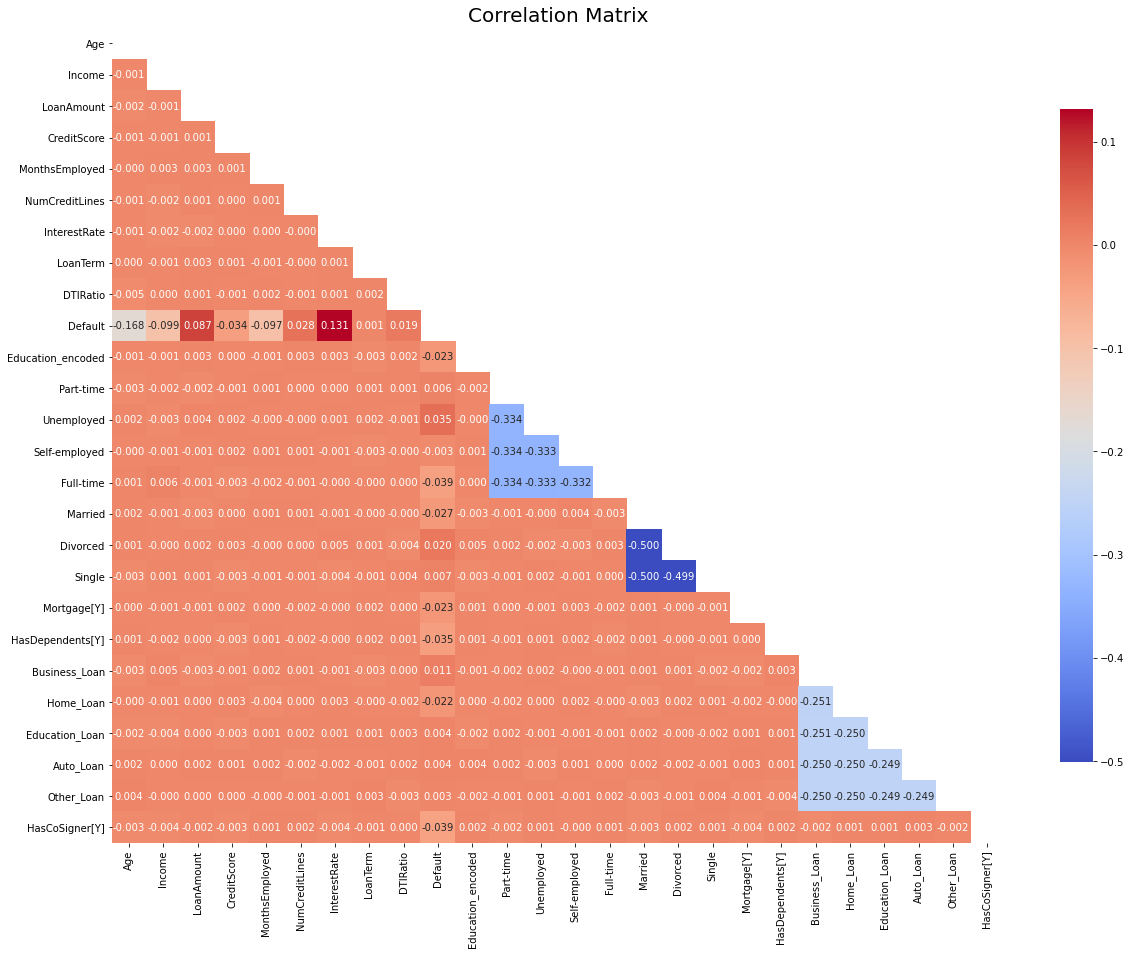

In [40]:
cor_matrix(df2)

* Positive correlated with Default:  
LoanAmount  
NumCreditLines  
InterestRate  
DTRatio  
Unemployed  
Divorced  
Business_Loan  
* Negative correlated with Default:  
Age  
Income  
CreditScore  
MonthsEmployed  
Full-time  
Married  
Mortgage[Y]  
HasDependents[Y]  
Home_Loan  
HasCosinger[Y]  


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                255347 non-null  int64  
 1   Income             255347 non-null  int64  
 2   LoanAmount         255347 non-null  int64  
 3   CreditScore        255347 non-null  int64  
 4   MonthsEmployed     255347 non-null  int64  
 5   NumCreditLines     255347 non-null  int64  
 6   InterestRate       255347 non-null  float64
 7   LoanTerm           255347 non-null  int64  
 8   DTIRatio           255347 non-null  float64
 9   Default            255347 non-null  int64  
 10  Education_encoded  255347 non-null  int64  
 11  Part-time          255347 non-null  int64  
 12  Unemployed         255347 non-null  int64  
 13  Self-employed      255347 non-null  int64  
 14  Full-time          255347 non-null  int64  
 15  Married            255347 non-null  int64  
 16  Di

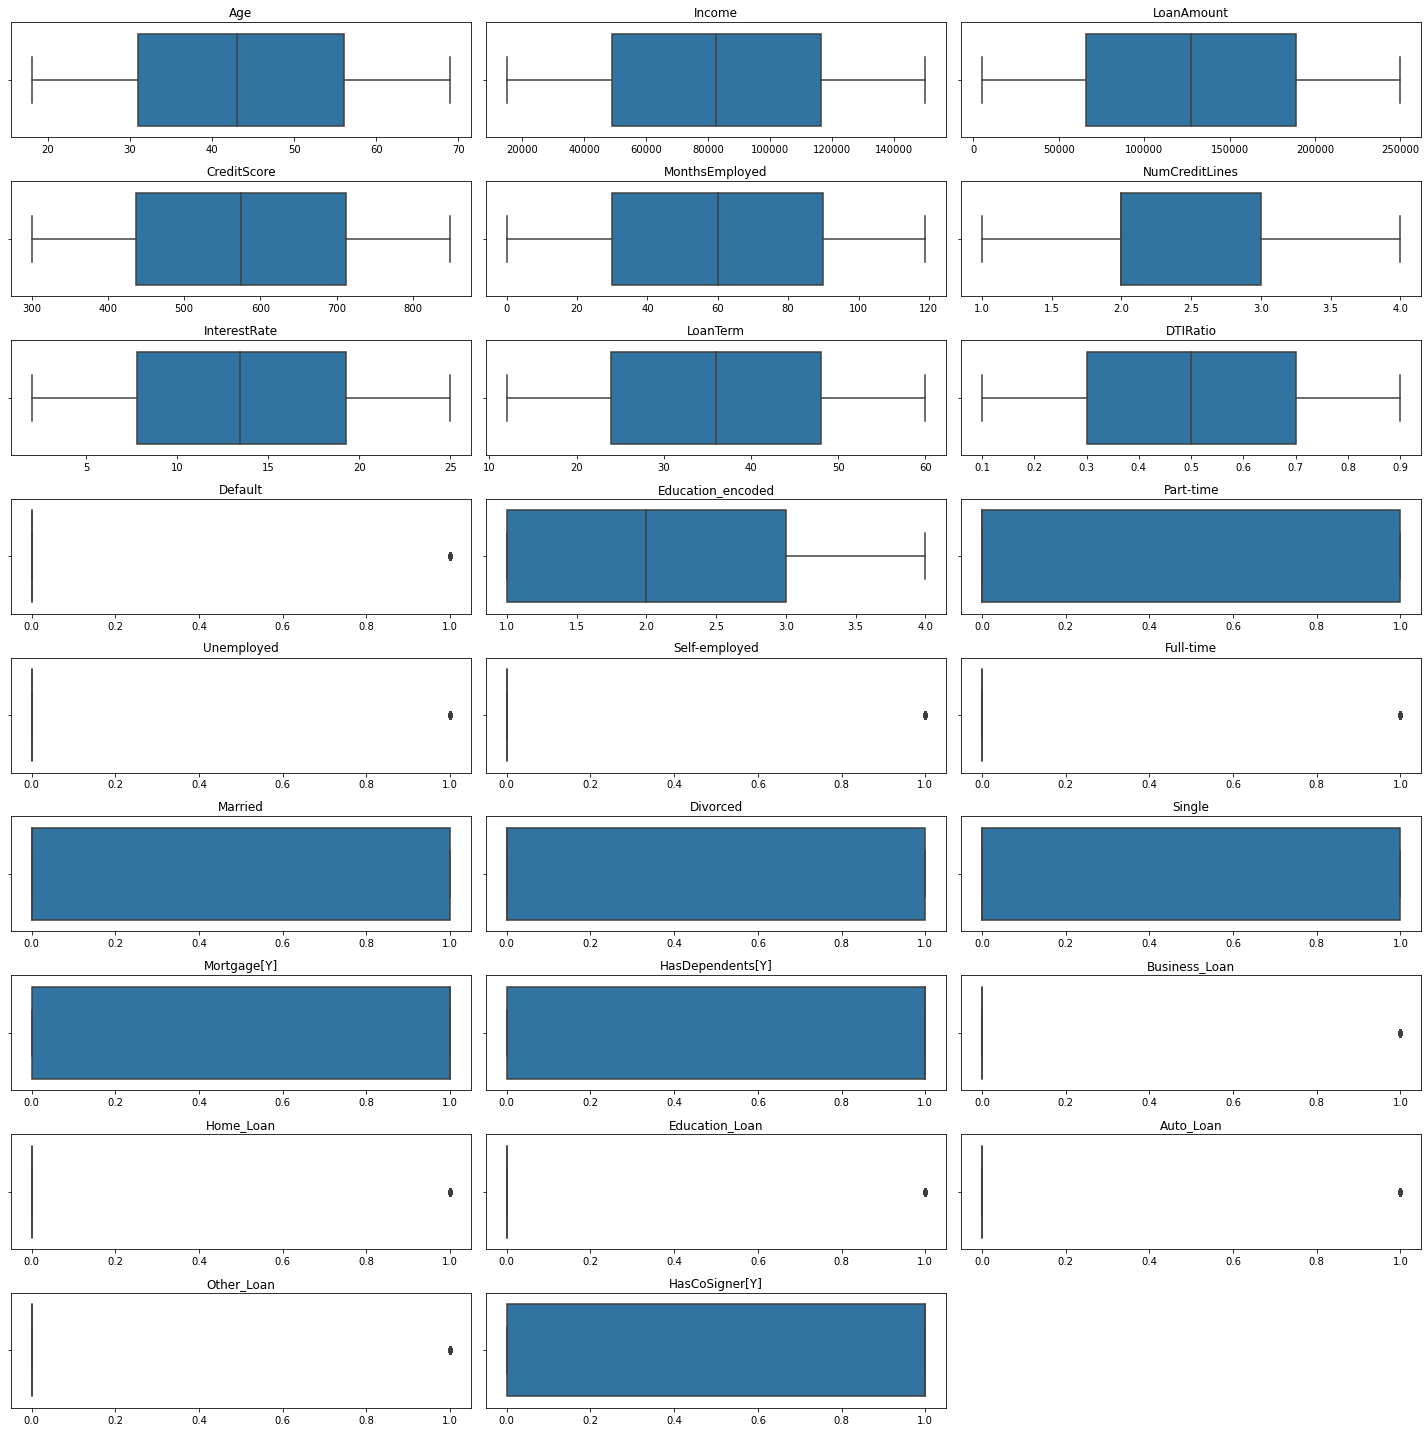

In [42]:
import math

# Determine the number of columns to be plotted
num_cols = df2.shape[1]
num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(20, 20))
ind = 1

for n in df2.columns:
    plt.subplot(num_rows, 3, ind)
    sns.boxplot(x=df2[n])
    plt.title(n)
    ind += 1
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [43]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [44]:
def logit(X,y, threshold, test_size):
    X = sm.add_constant(X)
    #Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size ,random_state=109)

    #Logistic Model
    log_model = sm.Logit(y_train,X_train).fit()
    print(log_model.summary())

    #Predictation on test data
    y_pred = log_model.predict(X_test)
    

    #Confusion Matrix
    X_test= X_test.copy()
    X_test.loc[:,'prediction']=0
    X_test.loc[y_pred>threshold ,'prediction']=1
    print("\nConfusion Matrix: \n", confusion_matrix(y_test,X_test['prediction']))

    print("\n",classification_report(y_test,X_test['prediction'],digits=3))

    #Compute training errors and true test errors
    y_train_pred=log_model.predict(X_train)
    X_train = X_train.copy()
    X_train.loc[:,'prediction']=0
    X_train.loc[y_train_pred>threshold,'prediction']=1
    print("\nTraining errors:",1 - metrics.accuracy_score(y_train,X_train['prediction']))
    print("True Test errors:",1 - metrics.accuracy_score(y_test, X_test['prediction']))
    print("AIC Score: ", log_model.aic)
    print("BIC Score: ", log_model.bic)
    
    # Assuming y_test and predicted_probabilities are available
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [45]:
df2.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default',
       'Education_encoded', 'Part-time', 'Unemployed', 'Self-employed',
       'Full-time', 'Married', 'Divorced', 'Single', 'Mortgage[Y]',
       'HasDependents[Y]', 'Business_Loan', 'Home_Loan', 'Education_Loan',
       'Auto_Loan', 'Other_Loan', 'HasCoSigner[Y]'],
      dtype='object')

Optimization terminated successfully.
         Current function value: 0.315971
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               204277
Model:                          Logit   Df Residuals:                   204254
Method:                           MLE   Df Model:                           22
Date:                Wed, 24 Jul 2024   Pseudo R-squ.:                  0.1207
Time:                        11:34:23   Log-Likelihood:                -64546.
converged:                       True   LL-Null:                       -73404.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0067      0.060      0.113      0.910      -0.110       0.123
Age     

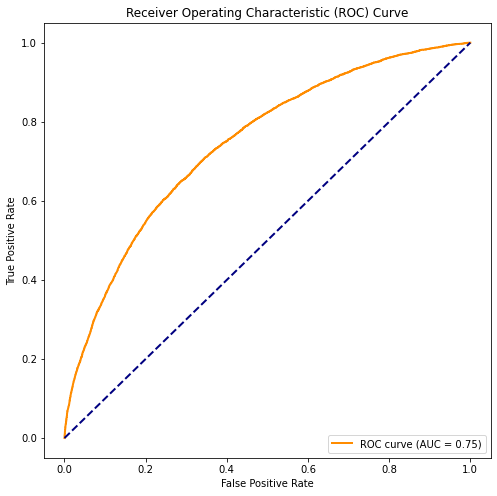

In [46]:
y = df2[['Default']]
x = df2[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
       'Education_encoded', 'Part-time', 'Self-employed',
       'Full-time', 'Married', 'Divorced', 'Mortgage[Y]',
       'HasDependents[Y]', 'Business_Loan', 'Home_Loan', 'Education_Loan',
       'Auto_Loan', 'HasCoSigner[Y]']]
logit(x,y,0.5,0.2)

Optimization terminated successfully.
         Current function value: 0.319274
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               178742
Model:                          Logit   Df Residuals:                   178732
Method:                           MLE   Df Model:                            9
Date:                Wed, 24 Jul 2024   Pseudo R-squ.:                  0.1119
Time:                        11:34:24   Log-Likelihood:                -57068.
converged:                       True   LL-Null:                       -64258.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6004      0.053    -11.284      0.000      -0.705      -0.496
InterestRate     

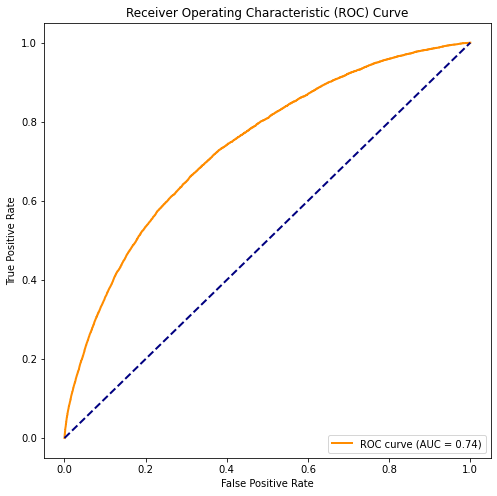

In [47]:
y = df2[['Default']]
x = df2[['InterestRate','LoanAmount','Age','Income','CreditScore','MonthsEmployed','NumCreditLines','DTIRatio','HasCoSigner[Y]']]
logit(x,y,0.5,0.3)

# Decision Tree and Ensemble Methods

In [48]:
X = df2[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
       'Education_encoded', 'Part-time', 'Unemployed', 'Self-employed',
       'Full-time', 'Married', 'Divorced', 'Single', 'Mortgage[Y]',
       'HasDependents[Y]', 'Business_Loan', 'Home_Loan', 'Education_Loan',
       'Auto_Loan', 'Other_Loan', 'HasCoSigner[Y]']]
y = df2[['Default']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

## Decision Tree

In [49]:
def decision_tree(X, y, test_size, random_state, max_depth, min_samples_split, min_samples_leaf,criterion):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth=max_depth, 
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf,
                                 criterion=criterion,
                                 random_state=random_state,
                                splitter='best')

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    y_train_pred = clf.predict(X_train)
    
    print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
    print("\nTraining errors:",1 - metrics.accuracy_score(y_train,y_train_pred))
    print("True Test errors:",1 - metrics.accuracy_score(y_test, y_pred))
    print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F1_score:", metrics.f1_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("recall:", metrics.recall_score(y_test, y_pred))
    print("\n",classification_report(y_test,y_pred,digits=3))

    #Decision Tree Graph
    feature_name = X.columns.to_list()
    fig = plt.figure(figsize=(25,20))
    tree.plot_tree(clf, feature_names=feature_name, filled=True, rounded=True)
    plt.show()

    return

Confusion Matrix:
 [[67741     0]
 [ 8864     0]]

Training errors: 0.11630730326392225
True Test errors: 0.11571046276352714

Accuracy: 0.8842895372364729
F1_score: 0.0
Precision: 0.0
recall: 0.0

               precision    recall  f1-score   support

           0      0.884     1.000     0.939     67741
           1      0.000     0.000     0.000      8864

    accuracy                          0.884     76605
   macro avg      0.442     0.500     0.469     76605
weighted avg      0.782     0.884     0.830     76605



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


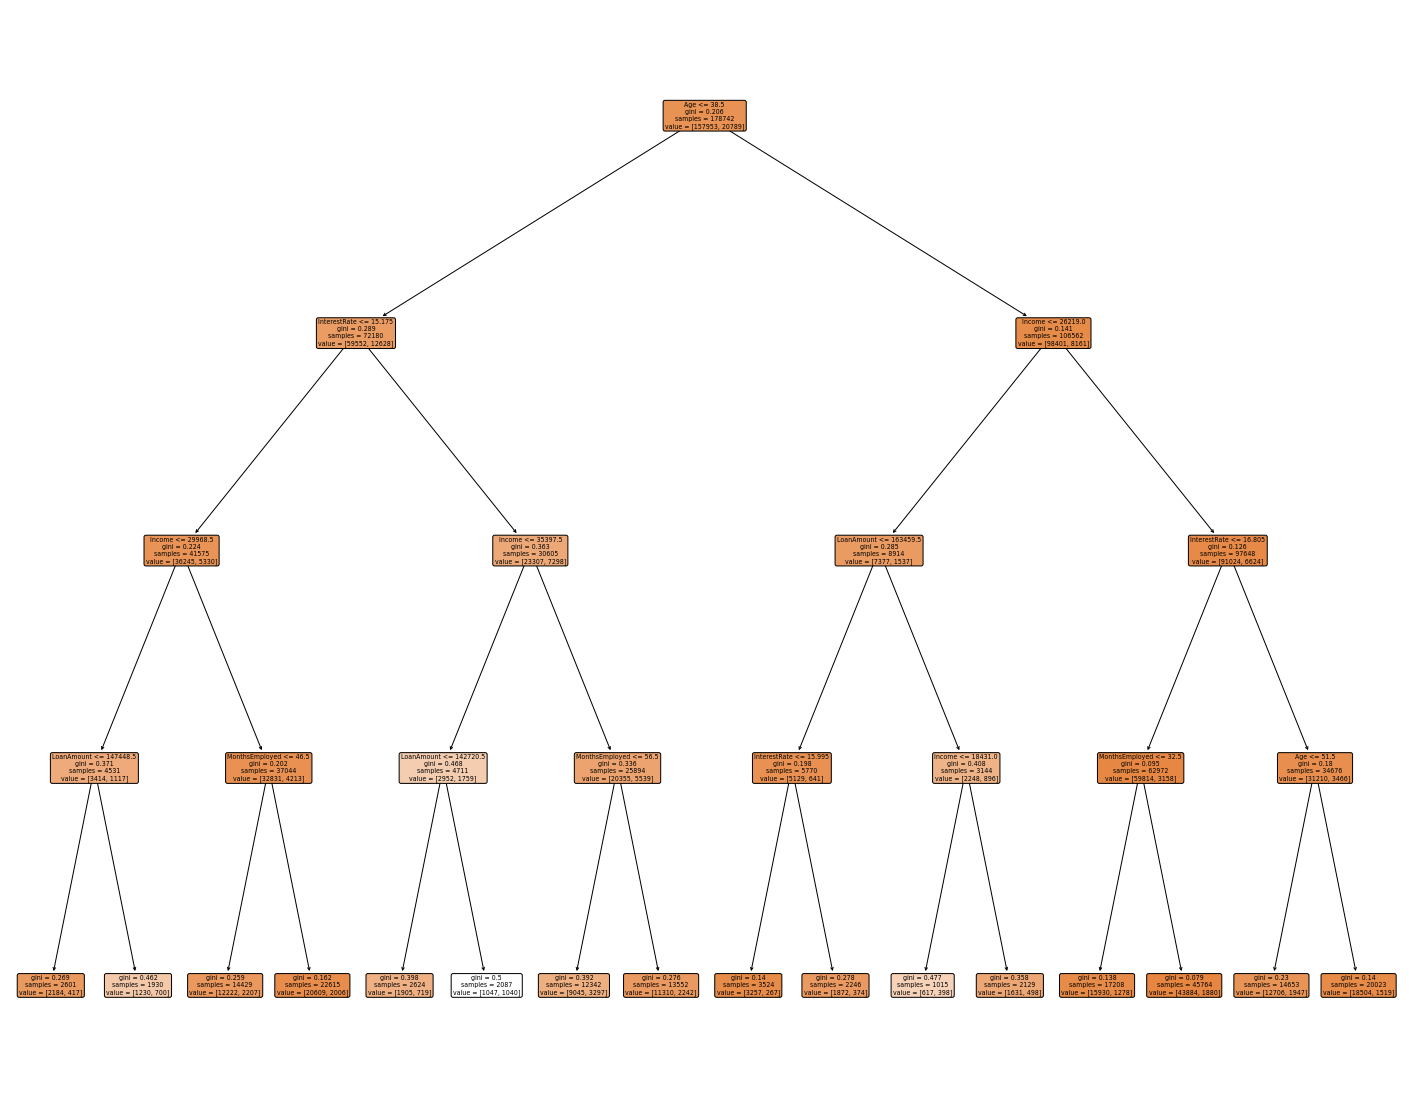

In [50]:
decision_tree(X, y, test_size=0.3, random_state=109, max_depth=4, 
              min_samples_split=100, min_samples_leaf=50,criterion='gini')

# Bagging

In [51]:
bag_model=BaggingClassifier(n_estimators=10, bootstrap=True,
random_state=109)
bag_model=bag_model.fit(X_train,y_train)
y_test_pred=bag_model.predict(X_test)
print("\nConfusion Matrix: \n", confusion_matrix(y_test,y_test_pred))
print("\n",classification_report(y_test,y_test_pred,digits=3))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Confusion Matrix: 
 [[44533   626]
 [ 5439   472]]

               precision    recall  f1-score   support

           0      0.891     0.986     0.936     45159
           1      0.430     0.080     0.135      5911

    accuracy                          0.881     51070
   macro avg      0.661     0.533     0.535     51070
weighted avg      0.838     0.881     0.843     51070



## Random Forest Classifier

In [52]:
rf_model=RandomForestClassifier(n_estimators=10, bootstrap=True,
max_features="auto", min_samples_leaf=10,random_state=109)
rf_model=rf_model.fit(X_train,y_train)
y_test_pred=rf_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_test_pred))
print("\n",classification_report(y_test,y_test_pred,digits=3))

<ipython-input-52-0e093f67dc02>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model=rf_model.fit(X_train,y_train)


[[45019   140]
 [ 5699   212]]

               precision    recall  f1-score   support

           0      0.888     0.997     0.939     45159
           1      0.602     0.036     0.068      5911

    accuracy                          0.886     51070
   macro avg      0.745     0.516     0.503     51070
weighted avg      0.855     0.886     0.838     51070



## Boosting

In [53]:
adaBoost_model=AdaBoostClassifier(n_estimators=10,
random_state=109)
adaBoost_model=adaBoost_model.fit(X_train,y_train)
y_test_pred=adaBoost_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_test_pred))
print("\n",classification_report(y_test,y_test_pred,digits=3))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[45051   108]
 [ 5745   166]]

               precision    recall  f1-score   support

           0      0.887     0.998     0.939     45159
           1      0.606     0.028     0.054      5911

    accuracy                          0.885     51070
   macro avg      0.746     0.513     0.496     51070
weighted avg      0.854     0.885     0.837     51070

